In [1]:
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("WhoScored_ENG-Premier League.csv")

: 

In [ ]:
example_match = matches[matches["game_id"] == 410988]

In [ ]:
example_match.columns

Index(['Unnamed: 0', 'fecha', 'league', 'season', 'game', 'id', 'game_id',
       'period', 'minute', 'second', 'expanded_minute', 'type', 'outcome_type',
       'team_id', 'team', 'player_id', 'player', 'x', 'y', 'end_x', 'end_y',
       'goal_mouth_y', 'goal_mouth_z', 'blocked_x', 'blocked_y', 'qualifiers',
       'is_touch', 'is_shot', 'is_goal', 'card_type', 'related_event_id',
       'related_player_id'],
      dtype='object')

In [29]:
print(example_match["type"].unique())
print(example_match["outcome_type"].unique())

['Start' 'FormationSet' 'End' 'Pass' 'Foul' 'Aerial' 'Clearance'
 'CornerAwarded' 'Punch' 'CrossNotClaimed' 'MissedShots' 'BallRecovery'
 'Interception' 'Dispossessed' 'Tackle' 'KeeperPickup' 'BallTouch' 'Claim'
 'Save' 'SavedShot' 'TakeOn' 'ChanceMissed' 'Challenge' 'OffsideProvoked'
 'OffsidePass' 'OffsideGiven' 'Goal' 'GoodSkill' 'SubstitutionOff'
 'SubstitutionOn' 'FormationChange' 'ShotOnPost' 'Card' 'KeeperSweeper']
['Successful' 'Unsuccessful']


In [30]:
tiros = example_match[example_match["is_shot"]== True]
pases = example_match[example_match["type"]== "Pass"]

In [31]:
tiros_astonVilla = tiros[tiros["team"] == "Aston Villa"]
tiros_westHam = tiros[tiros["team"] == "West Ham"]
pases_astonVilla = pases[pases["team"] == "Aston Villa"]
pases_westHam = pases[pases["team"] == "West Ham"]

In [32]:
tiros_astonVilla.head()

,Unnamed: 0,fecha,league,season,game,id,game_id,period,minute,second,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
43,43,2010-08-14,ENG-Premier League,1011,2010-08-14 Aston Villa-West Ham,2.006527e+09,410988,FirstHalf,2,25.0,...,66.7,NaN,NaN,"[{'type': {'displayName': 'SmallBoxCentre', 'v...",True,True,NaN,NaN,22.0,5641.0
83,83,2010-08-14,ENG-Premier League,1011,2010-08-14 Aston Villa-West Ham,5.609581e+08,410988,FirstHalf,4,50.0,...,54.2,NaN,NaN,"[{'type': {'displayName': 'GoalMouthY', 'value...",True,True,NaN,NaN,58.0,5641.0
125,125,2010-08-14,ENG-Premier League,1011,2010-08-14 Aston Villa-West Ham,1.387746e+09,410988,FirstHalf,7,47.0,...,NaN,81.2,43.5,"[{'type': {'displayName': 'RegularPlay', 'valu...",True,True,NaN,NaN,89.0,2928.0
129,129,2010-08-14,ENG-Premier League,1011,2010-08-14 Aston Villa-West Ham,2.999702e+08,410988,FirstHalf,8,17.0,...,55.6,NaN,NaN,"[{'type': {'displayName': 'GoalMouthY', 'value...",True,True,NaN,NaN,92.0,42147.0
238,238,2010-08-14,ENG-Premier League,1011,2010-08-14 Aston Villa-West Ham,1.746013e+09,410988,FirstHalf,14,4.0,...,9.7,96.9,48.9,"[{'type': {'displayName': 'LowCentre', 'value'...",True,True,NaN,NaN,NaN,NaN


In [33]:
'''
Graficando pases en campo de futbol
'''
sbred = '#FF0000'
#detalles de los colores de las lineas en el grafico
cmaplist = ["white",'#00FFFF', '#00FF80','#00FF00','#80FF00','#FFFF00','#FF8000','#FF0000']
cmap = LinearSegmentedColormap.from_list("", cmaplist)

In [77]:
def shotMap(tiros,bins_x,bins_y):
    # Cancha
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white',
                  line_color='black', line_zorder=2)
    fig, ax = pitch.draw(
        figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Tiros
    bin_statistic = pitch.bin_statistic(
        tiros.x, tiros.y, statistic="count", bins=(bins_x, bins_y), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=1, cmap=cmap)

    # Flechas
    # pitch.arrows(tiros.x, tiros.y, tiros.GoalMouthY, 0, width=1,
    #              headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label="Tiros")
    shot_position = plt.scatter(tiros.x, tiros.y)

def passMap(pases,bins_x,bins_y):
    # Cancha
    pitch = Pitch(pitch_type='opta', pitch_color='white',
                  line_color='black', line_zorder=2)
    fig, ax = pitch.draw(
        figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Pases
    bin_statistic = pitch.bin_statistic(
        pases.end_x, pases.end_y, statistic="count", bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=1, cmap=cmap)

    # Flechas
    pitch.arrows(pases.x, pases.y, pases.end_x, pases.end_y, width=1,
                 headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label="Pases")
    pases_position = plt.scatter(pases.x, pases.y)
    

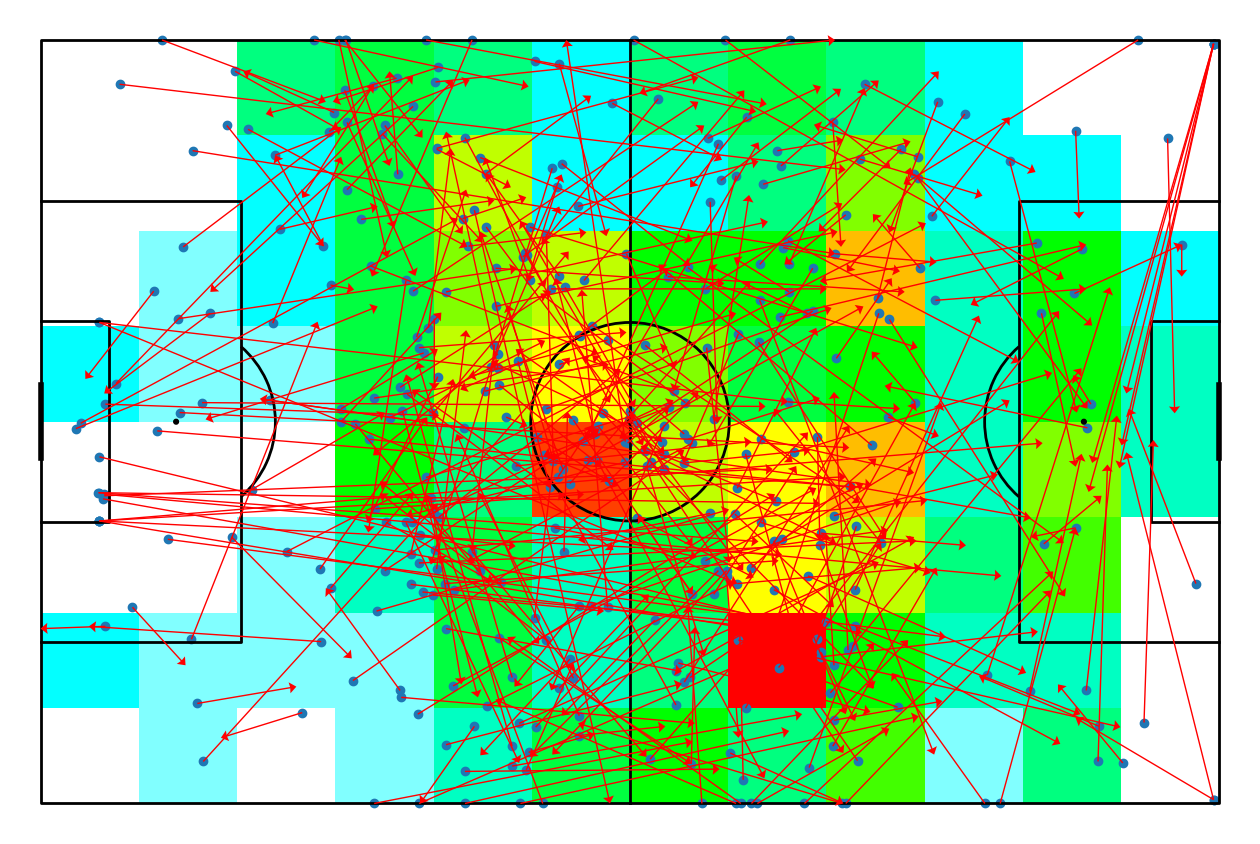

In [78]:
passMap(pases_westHam,12,8)

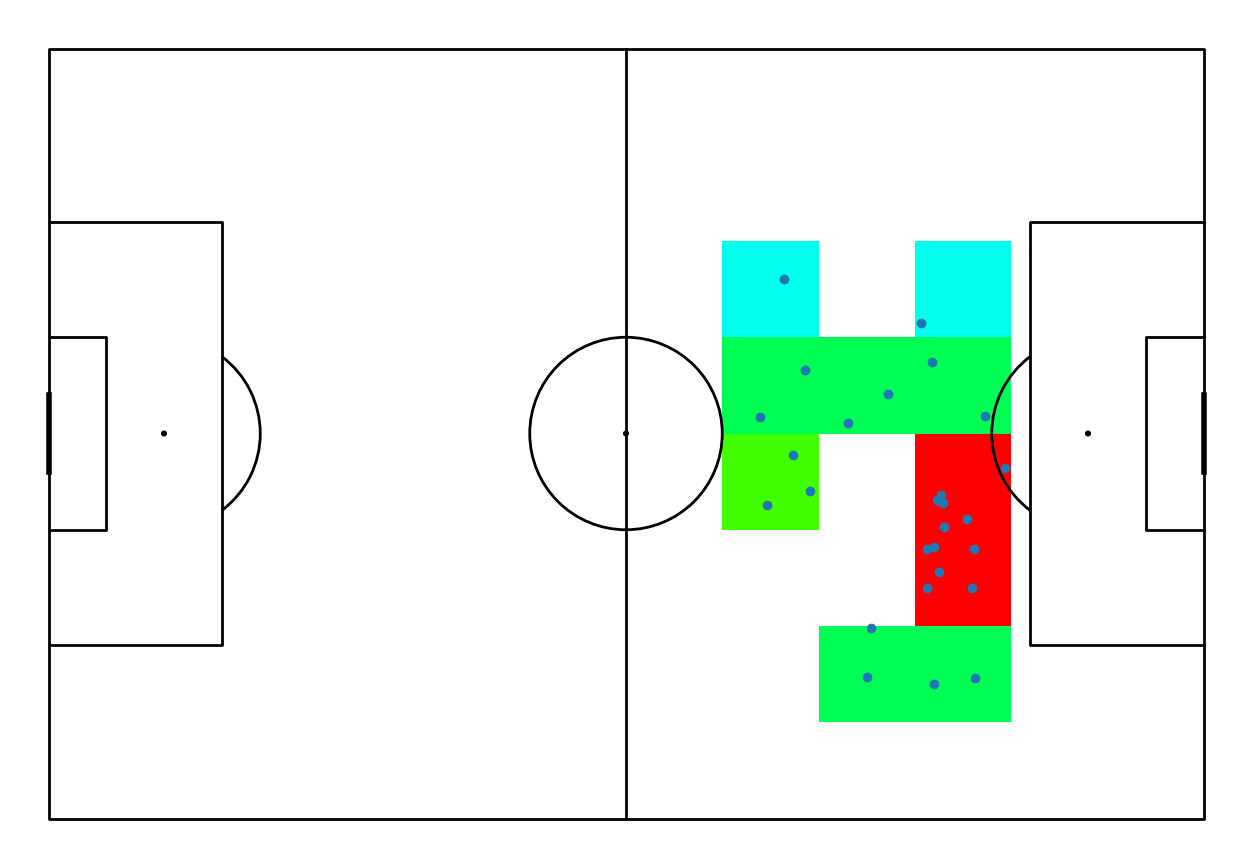

In [79]:
shotMap(tiros_astonVilla, 12, 8)